In [3]:
import pandas as pd
import numpy as np
import os
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
os.getcwd()



'/Users/bonaventurapacileo/Documents/IS-DS/VR'

## Remember to divide all values by 1000

### Scene indices:
 - 0 Menu
 - 1 Gym
 - 2 TouchObject
 - 3 Fruit picking
 - 4 Gym_TimeTrials
 - 5 Calibration
 - 6 Sorting


In [4]:
cols = ['index','scene_index','time','ms_lastline','head_posx',"head_posy","head_posz","head_rotx","head_roty","head_rotz",
        "right_posx","right_posy","right_posz","right_rotx","right_roty","right_rotz",
        "left_posx","left_posy","left_posz","left_rotx","left_roty","left_rotz",]
alldata = pd.read_table('monitorData 25-02-2020.txt', sep=',', header=0, names=cols)

In [5]:
alldata.loc[:,'head_posx':] = alldata.loc[:,'head_posx':]/1000

168.0

In [122]:
gym = alldata[alldata.scene_index==1]
gym.head()

,index,scene_index,time,ms_lastline,head_posx,head_posy,head_posz,head_rotx,head_roty,head_rotz,...,right_posz,right_rotx,right_roty,right_rotz,left_posx,left_posy,left_posz,left_rotx,left_roty,left_rotz
3664,3665,1,22:59:48,13,0.054,1.674,-0.060,11.235,310.247,359.307,...,0.237,1.163,332.626,244.281,-0.091,1.194,0.081,3.421,353.836,105.029
3665,3666,1,22:59:48,13,0.052,1.674,-0.061,11.300,309.563,359.593,...,0.237,1.188,331.955,243.751,-0.085,1.191,0.081,5.034,352.513,110.342
3666,3667,1,22:59:48,13,0.052,1.675,-0.062,11.217,309.387,359.646,...,0.237,1.055,331.727,243.794,-0.083,1.188,0.081,5.793,351.804,112.219
3667,3668,1,22:59:48,13,0.052,1.675,-0.062,11.217,309.387,359.646,...,0.237,1.026,331.651,243.799,-0.083,1.188,0.081,6.069,351.525,112.828
3668,3669,1,22:59:48,13,0.052,1.675,-0.062,11.166,309.322,359.627,...,0.237,1.044,331.654,243.806,-0.083,1.188,0.081,6.159,351.948,112.600


#### In every second there are 72 frames registered, so every line is registered every 13 ms = floor(1000/72)

In [123]:
gym['time'] = pd.to_datetime(gym['time'], format="%H:%M:%S").dt.time

gym = gym[gym.time >= datetime.time(19,30,10)]


/Users/bonaventurapacileo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
cols = ["head_rotx","head_roty","head_rotz","right_rotx","right_roty","right_rotz",
        "left_rotx","left_roty","left_rotz"]

for col in cols:
    #print(col)
    gym[str(col+"_n")] = gym[col]
    gym.loc[gym[str(col+"_n")]>180,str(col+"_n")] = gym.loc[gym[col]>180,col] - 360

In [125]:
timedelta = pd.to_timedelta(gym.time.astype(str))
diff = timedelta.diff().fillna(pd.Timedelta(seconds=0))/1e9
gym['seconds'] = np.cumsum(diff).astype(int)




In [126]:
timedelta = timedelta.reset_index()


for row in range(1,len(timedelta)):
    timedelta.time[row] = timedelta.time[row - 1] + datetime.timedelta(milliseconds=13)
gym = gym.reset_index()
#gym['time_ms'] = timedelta.time


/Users/bonaventurapacileo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [138]:
ms_time = [0]
for row in range(1,len(gym)):
    ms_time.append(ms_time[row-1] + 13)

gym['ms_time'] = ms_time

In [145]:
gym.to_excel('move_demo_272.xlsx', index=False)

In [144]:
gym.time.max() # 22:59:48 23 3 1

datetime.time(23, 3, 1)

### Plots

Text(0.5, 0, '')

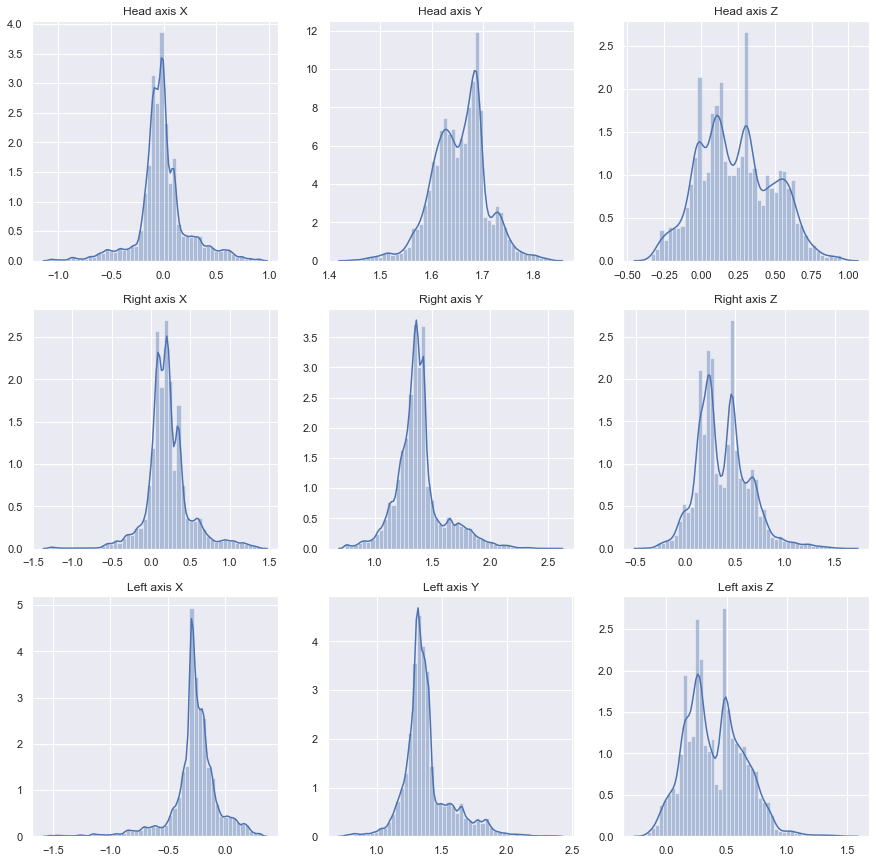

In [370]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
sns.set_context('notebook', font_scale=1) #poster



sns.distplot(gym.head_posx, ax=ax[0,0], kde=True )
ax[0,0].set_title("Head axis X")
ax[0,0].set_xlabel("")


sns.distplot(gym.head_posy, ax=ax[0,1], kde=True )
ax[0,1].set_title("Head axis Y")
ax[0,1].set_xlabel("")


sns.distplot(gym.head_posz, ax=ax[0,2], kde=True )
ax[0,2].set_title("Head axis Z")
ax[0,2].set_xlabel("")


sns.distplot(gym.right_posx, ax=ax[1,0], kde=True )
ax[1,0].set_title("Right axis X")
ax[1,0].set_xlabel("")


sns.distplot(gym.right_posy, ax=ax[1,1], kde=True )
ax[1,1].set_title("Right axis Y")
ax[1,1].set_xlabel("")


sns.distplot(gym.right_posz, ax=ax[1,2], kde=True )
ax[1,2].set_title("Right axis Z")
ax[1,2].set_xlabel("")


sns.distplot(gym.left_posx, ax=ax[2,0], kde=True )
ax[2,0].set_title("Left axis X")
ax[2,0].set_xlabel("")


sns.distplot(gym.left_posy, ax=ax[2,1], kde=True )
ax[2,1].set_title("Left axis Y")
ax[2,1].set_xlabel("")


sns.distplot(gym.left_posz, ax=ax[2,2], kde=True )
ax[2,2].set_title("Left axis Z")
ax[2,2].set_xlabel("")


Scene objects rendered every frame, player only sees 72 images per second. human eye cannot detect is a succession of still images. Euler angles so only degree angles in 3 directions. x,y,z

Text(0.5, 1.0, 'Boxplot of Head axis Y')

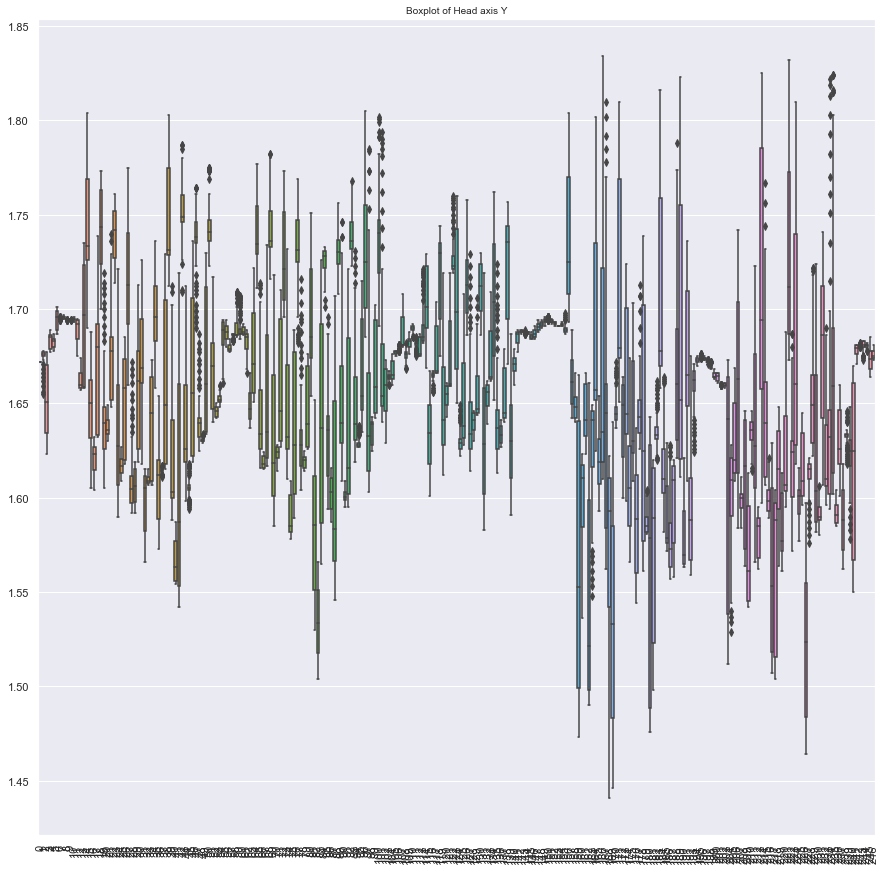

In [415]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_context('notebook', font_scale=0.6) #poster

fig=sns.boxplot(x = "seconds", y = "head_posy", ax=ax, data = gym)
plt.xticks(rotation=90)
ax.set_xlabel("")
ax.set_ylabel("")
fig.set_title("Boxplot of Head axis Y", fontsize=10)

Text(0.5, 1.0, 'Lineplot of LEFT axis Z')

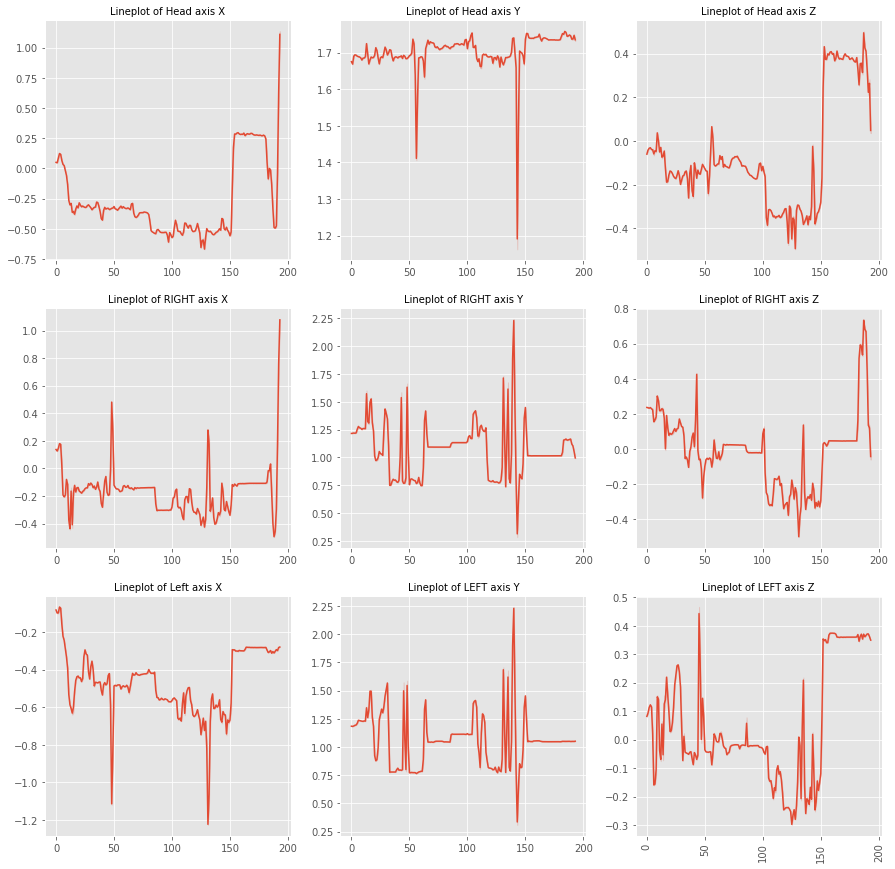

In [140]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
sns.set_context('notebook', font_scale=1) #poster


fig=sns.lineplot(x = 'seconds', y = "head_posx", ax=ax[0,0], data = gym)
plt.xticks(rotation=90)
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")
fig.set_title("Lineplot of Head axis X", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_posy", ax=ax[0,1], data = gym)
plt.xticks(rotation=90)
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")
fig.set_title("Lineplot of Head axis Y", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_posz", ax=ax[0,2], data = gym)
plt.xticks(rotation=90)
ax[0,2].set_xlabel("")
ax[0,2].set_ylabel("")
fig.set_title("Lineplot of Head axis Z", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "right_posx", ax=ax[1,0], data = gym)
plt.xticks(rotation=90)
ax[1,0].set_xlabel("")
ax[1,0].set_ylabel("")
fig.set_title("Lineplot of RIGHT axis X", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "right_posy", ax=ax[1,1], data = gym)
plt.xticks(rotation=90)
ax[1,1].set_xlabel("")
ax[1,1].set_ylabel("")
fig.set_title("Lineplot of RIGHT axis Y", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "right_posz", ax=ax[1,2], data = gym)
plt.xticks(rotation=90)
ax[1,2].set_xlabel("")
ax[1,2].set_ylabel("")
fig.set_title("Lineplot of RIGHT axis Z", fontsize=10)


fig=sns.lineplot(x = 'seconds', y = "left_posx", ax=ax[2,0], data = gym)
plt.xticks(rotation=90)
ax[2,0].set_xlabel("")
ax[2,0].set_ylabel("")
fig.set_title("Lineplot of Left axis X", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "left_posy", ax=ax[2,1], data = gym)
plt.xticks(rotation=90)
ax[2,1].set_xlabel("")
ax[2,1].set_ylabel("")
fig.set_title("Lineplot of LEFT axis Y", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "left_posz", ax=ax[2,2], data = gym)
plt.xticks(rotation=90)
ax[2,2].set_xlabel("")
ax[2,2].set_ylabel("")
fig.set_title("Lineplot of LEFT axis Z", fontsize=10)





### Range of motion
#### Active
- Touch chin for flexion
- Throw head back for extension
- Touch each shoulder with ears for lateral flexion
- Touch each shoulder with chin for lateral rotation
##### Normal:
- 30 degree rotation, 
- able to touch chest with chin,
- 55 degree extension and 
- 40 degree lateral bend.
- No resistance during the range of motion.

The neck is more mobile than the middle and lower spine, with large ranges of mobility for flexion (forward bending), extension (backward bending), side bending and rotation. This allows us to move our head in many directions and receive visual input from our surroundings and for balance. The upper cervical spine is primarily responsible for rotation, while the middle and lower cervical spine are responsible for side bending. The motions of flexion and extension are dispersed among all cervical spine levels.

The motion of the neck would not be complete without the simultaneous movement of the middle back in the same direction.

The neck's normal range of motion will vary. However, motion should feel free and there should be no pain or stiffness at the end range.

Text(0.5, 1.0, 'Lineplot of Head rotation axis Z (scaled)')

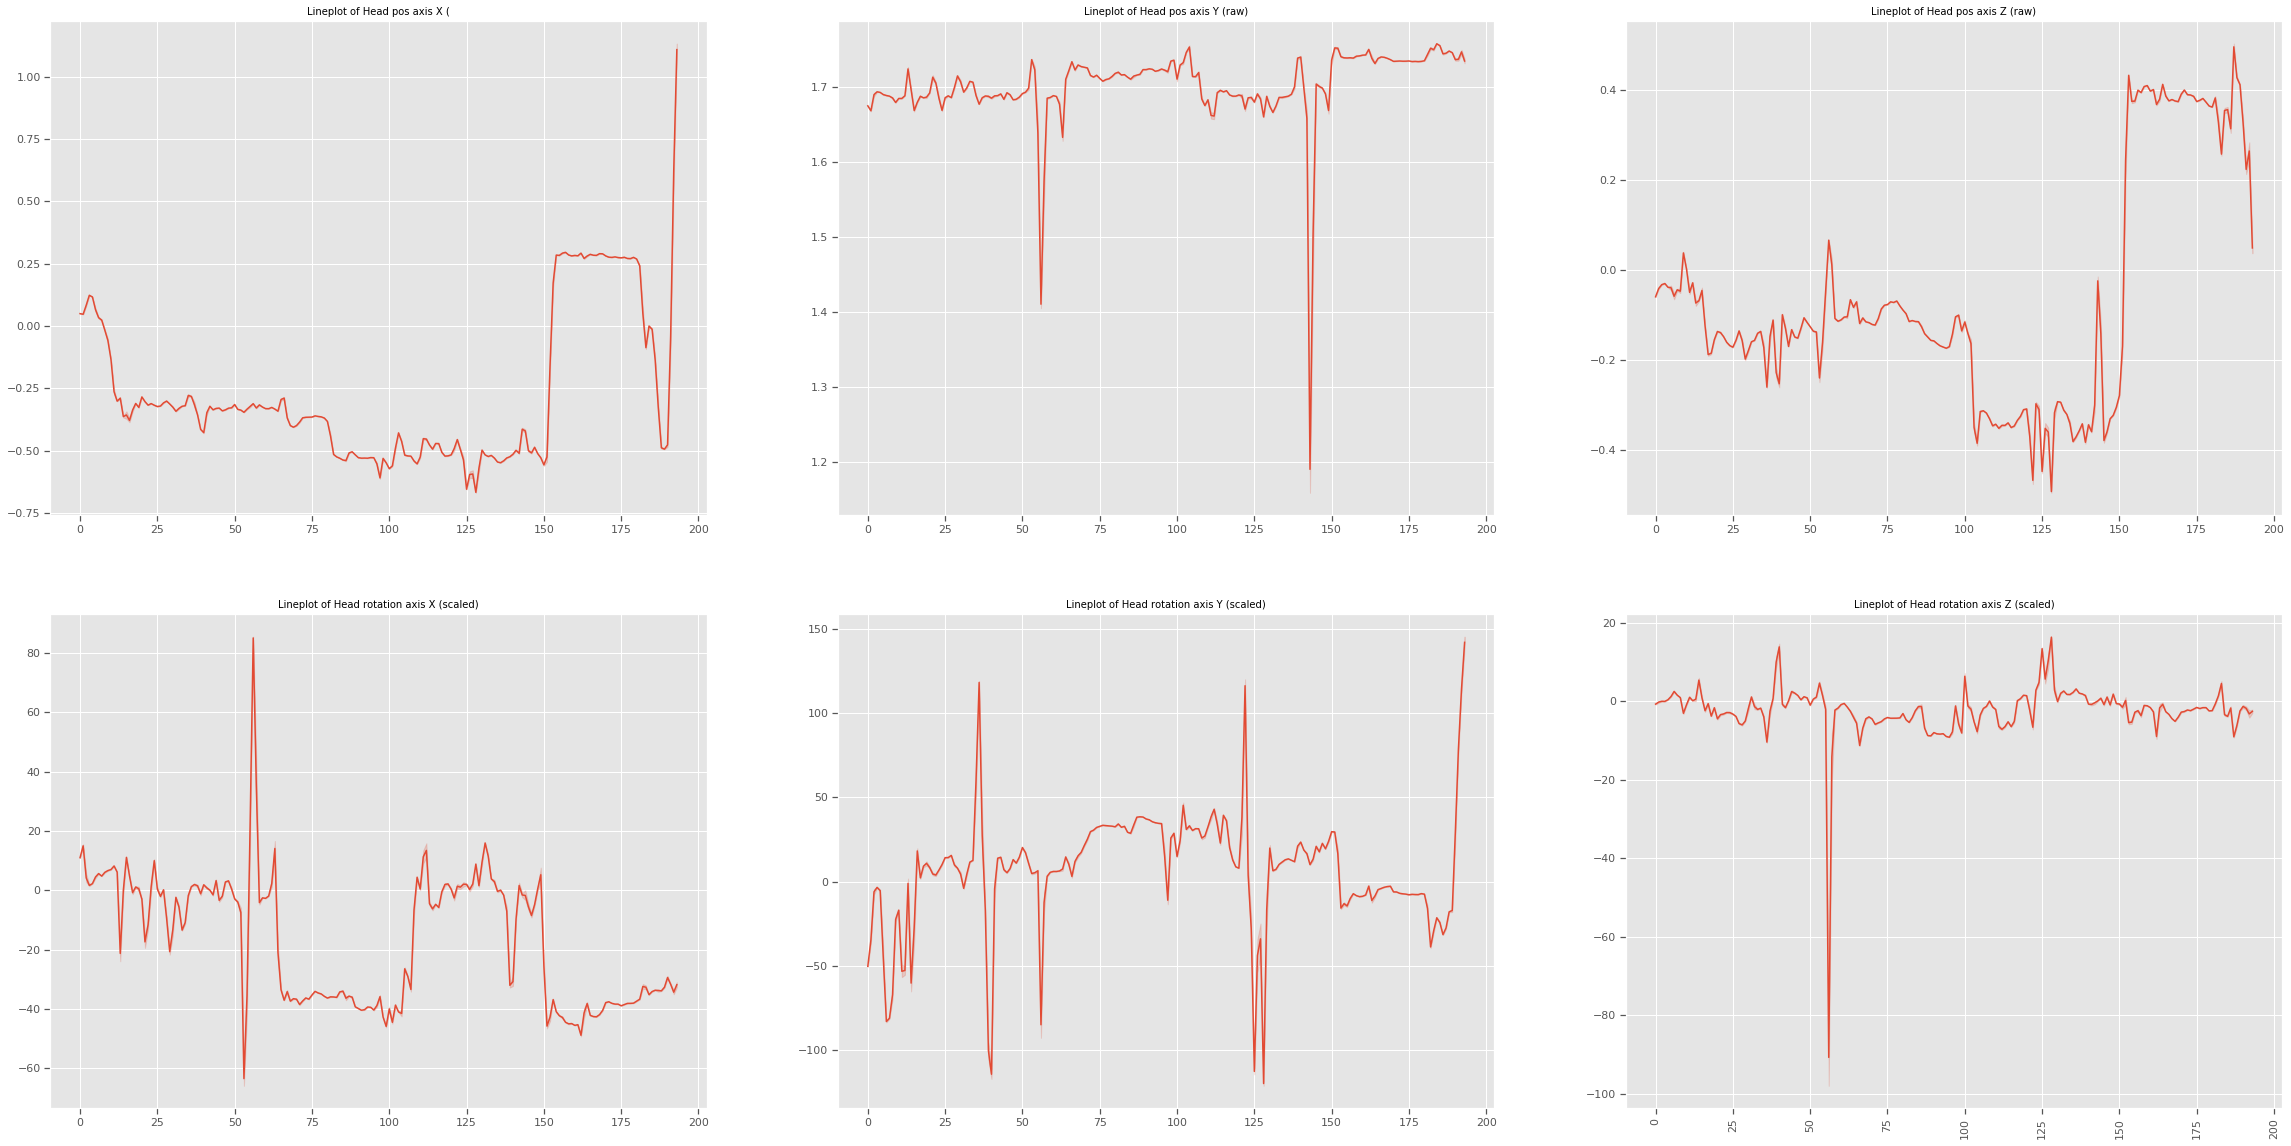

In [141]:
fig, ax = plt.subplots(2,3,figsize=(40,20))
#sns.set_context('notebook', font_scale=1) #rotter

fig=sns.lineplot(x = 'seconds', y = "head_posx", ax=ax[0,0], data = gym)
plt.xticks(rotation=90)
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")
fig.set_title("Lineplot of Head pos axis X (", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_posy", ax=ax[0,1], data = gym)
plt.xticks(rotation=90)
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")
fig.set_title("Lineplot of Head pos axis Y (raw)", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_posz", ax=ax[0,2], data = gym)
plt.xticks(rotation=90)
ax[0,2].set_xlabel("")
ax[0,2].set_ylabel("")
fig.set_title("Lineplot of Head pos axis Z (raw)", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_rotx_n", ax=ax[1,0], data = gym)
plt.xticks(rotation=90)
ax[1,0].set_xlabel("")
ax[1,0].set_ylabel("")
fig.set_title("Lineplot of Head rotation axis X (scaled)", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_roty_n", ax=ax[1,1], data = gym)
plt.xticks(rotation=90)
ax[1,1].set_xlabel("")
ax[1,1].set_ylabel("")
fig.set_title("Lineplot of Head rotation axis Y (scaled)", fontsize=10)

fig=sns.lineplot(x = 'seconds', y = "head_rotz_n", ax=ax[1,2], data = gym)
plt.xticks(rotation=90)
ax[1,2].set_xlabel("")
ax[1,2].set_ylabel("")
fig.set_title("Lineplot of Head rotation axis Z (scaled)", fontsize=10)




In [43]:
gym.to_excel("gym.xlsx", header=True, index=False)

In [42]:
os.getcwd()

'/Users/bonaventurapacileo/Documents/IS-DS/VR'

RuntimeError: Requested MovieWriter (ffmpeg) not available

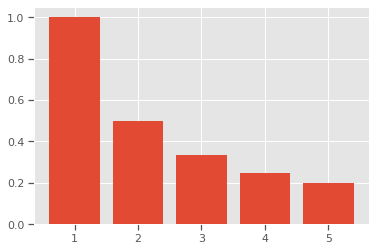

In [54]:
'''import matplotlib.pyplot as plt
from matplotlib import animation

def barlist(n): 
    return [1/float(n*k) for k in range(1,6)]

fig=plt.figure()

n=100 #Number of frames
x=range(1,6)
barcollection = plt.bar(x,barlist(1))

def animate(i):
    y=barlist(i+1)
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=100)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

anim.save('mymovie.gif',writer=writer)
plt.show()'''